In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from matplotlib.dates import DateFormatter
from sklearn.model_selection import TimeSeriesSplit


In [2]:
# plotting defaults
#plt.rc('figure', figsize=(13, 7))
#plt.style.use('seaborn-whitegrid')
#plt.rc('font', size=16)

In [3]:
url = "https://gist.githubusercontent.com/ryanorsinger/0ec766c66f4089bdcbc1d4fb294a3394/raw/197c1f0d7b55a45f29437811bc73d9c4ef8af647/sa_temps.csv"
df = pd.read_csv(url, index_col='datetime', parse_dates=True).sort_index()
df.temp = (df.temp - 273.15) * 1.8 + 32

print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)

df.head(10)

Date Range: 2012-10-01 13:00:00 to 2017-11-30 00:00:00
Shape: (45252, 1)


,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747
2012-10-01 18:00:00,61.327473
2012-10-01 19:00:00,61.390200
2012-10-01 20:00:00,61.452926
2012-10-01 21:00:00,61.515652


### Splitting our data

- Human-based
- Percentage based
- Cross-validation

### Human-based Splitting

In [4]:
train_len = int(0.6 * len(df))
val_test_split = int(0.8 * len(df))
train_len, val_test_split

(27151, 36201)

In [5]:
train = df.iloc[:train_len]
val = df.iloc[train_len:val_test_split]
test = df.iloc[val_test_split:]
train.shape, val.shape, test.shape

((27151, 1), (9050, 1), (9051, 1))

### SKlearn Time Series Split

In [ ]:
tss = TimeSeriesSplit(n_splits = 3)

In [ ]:
#Must seperate out target varialbe. 

In [ ]:
#I don't understand the comma in the slice

#for train_index, test_index in tss.split(X):
#    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
#    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

### Visualize individual variables

<AxesSubplot:xlabel='temp', ylabel='Count'>

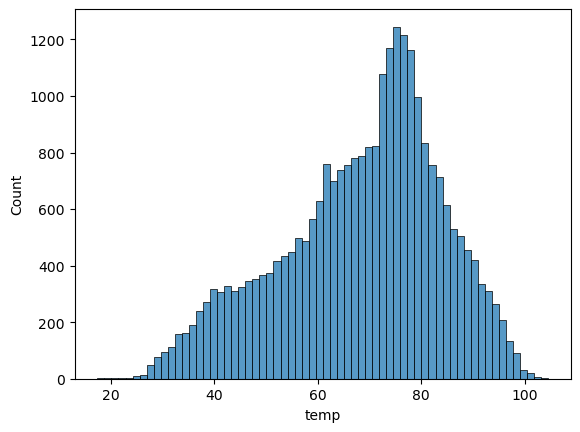

In [6]:
sns.histplot(data=train, x='temp')

In [7]:
train['month'] = train.index.month_name()

/var/folders/sg/9h_lqlfd6bgb63_prv2nr4mm0000gn/T/ipykernel_6351/1178602148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['month'] = train.index.month_name()


In [8]:
train.head()

,temp,month
datetime,,
2012-10-01 13:00:00,61.052000,October
2012-10-01 14:00:00,61.076568,October
2012-10-01 15:00:00,61.139294,October
2012-10-01 16:00:00,61.202020,October
2012-10-01 17:00:00,61.264747,October


<AxesSubplot:xlabel='month'>

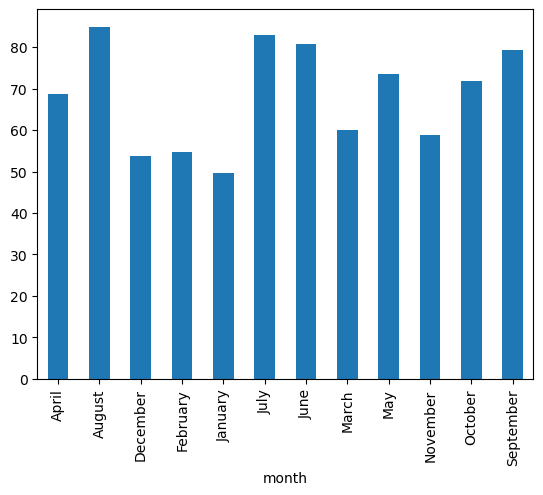

In [9]:
train.groupby('month')['temp'].mean().plot.bar()

### Viz over time

<AxesSubplot:xlabel='datetime'>

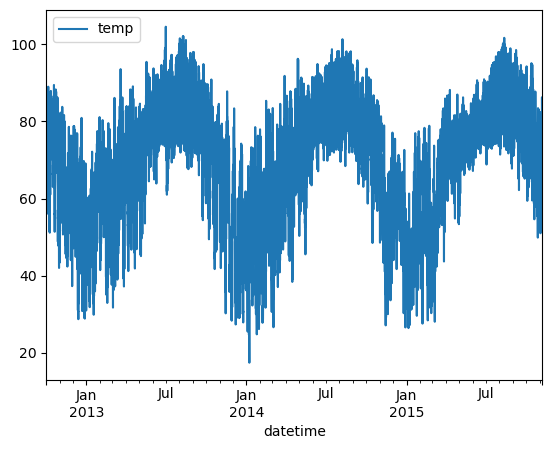

In [10]:
train.plot()

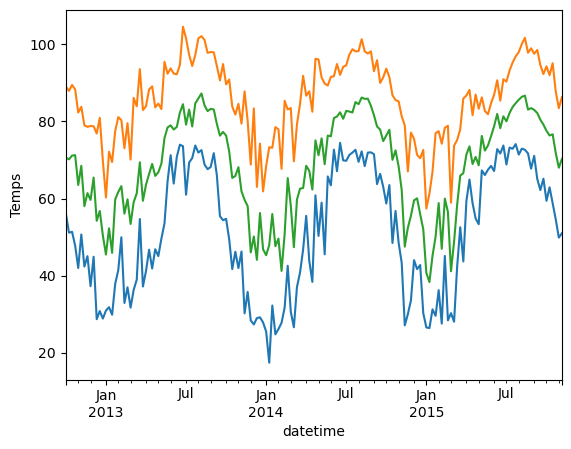

In [17]:
train.resample('W').min()['temp'].plot()
train.resample('W').max()['temp'].plot()
train.resample('W').mean()['temp'].plot()
plt.ylabel("Temps")
plt.show()

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='datetime'>

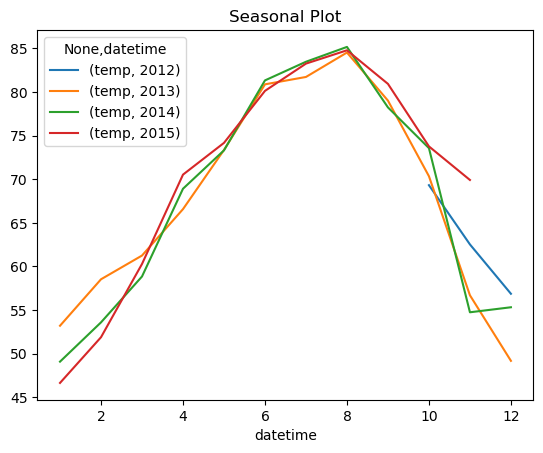

In [18]:
train.groupby([train.index.year, train.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

In [26]:
train.groupby([train.index.year, train.index.month]).mean().unstack(0)

temp                                 
datetime       2012       2013       2014       2015
datetime                                            
1               NaN  53.192333  49.072897  46.631940
2               NaN  58.522799  53.579080  51.874683
3               NaN  61.244479  58.842459  60.277705
4               NaN  66.569717  68.908933  70.526879
5               NaN  73.358529  73.311970  74.169747
6               NaN  80.885728  81.337658  80.135967
7               NaN  81.731819  83.476876  83.264325
8               NaN  84.534117  85.178102  84.789859
9               NaN  79.016805  78.238621  80.938208
10        69.318705  70.343832  73.567252  73.766466
11        62.521575  56.686028  54.735951  69.915052
12        56.860014  49.165310  55.311824        NaN

### Lag plots

Text(0, 0.5, 'temp tomorrow')

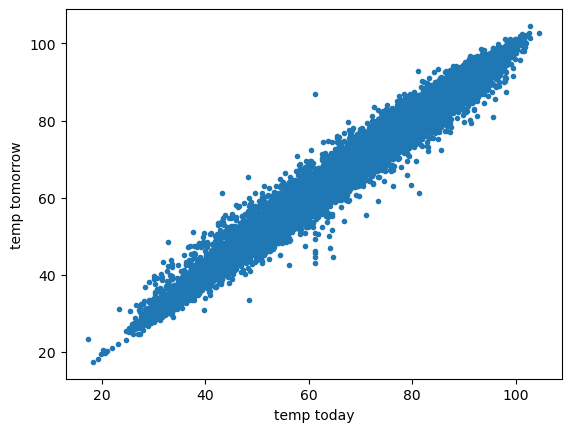

In [29]:
plt.scatter(train.temp, train.temp.shift(-1), marker='.')
plt.xlabel('temp today')
plt.ylabel('temp tomorrow')

In [30]:
week_mean = train.resample('W').mean()

In [31]:
week_mean

,temp
datetime,
2012-10-07,70.595201
2012-10-14,70.152821
2012-10-21,71.138375
2012-10-28,71.230464
2012-11-04,63.510554
...,...
2015-10-11,76.334871
2015-10-18,76.649744
2015-10-25,71.780166


In [33]:
week_mean['shifted'] = week_mean['temp'].shift(-1)

In [34]:
week_mean

,temp,shifted
datetime,,
2012-10-07,70.595201,70.152821
2012-10-14,70.152821,71.138375
2012-10-21,71.138375,71.230464
2012-10-28,71.230464,63.510554
2012-11-04,63.510554,68.482625
...,...,...
2015-10-11,76.334871,76.649744
2015-10-18,76.649744,71.780166
2015-10-25,71.780166,67.988276


Text(0, 0.5, 'Temp next week')

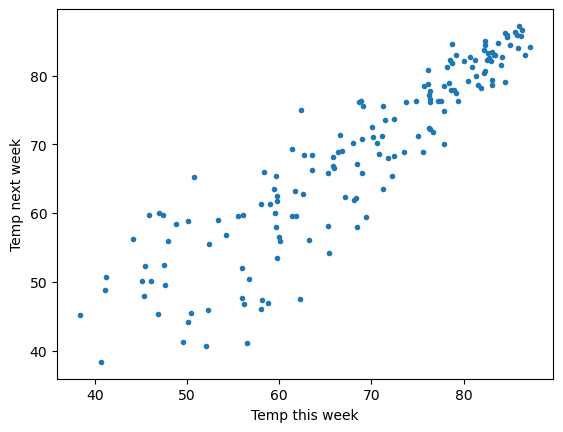

In [36]:
plt.scatter(week_mean['temp'], week_mean['shifted'], marker='.')
plt.xlabel('Temp this week')
plt.ylabel('Temp next week')

In [37]:
week_mean['half_year'] = week_mean['temp'].shift(-26)

week_mean.head()

,temp,shifted,half_year
datetime,,,
2012-10-07,70.595201,70.152821,63.558611
2012-10-14,70.152821,71.138375,66.345532
2012-10-21,71.138375,71.230464,68.965502
2012-10-28,71.230464,63.510554,65.862071
2012-11-04,63.510554,68.482625,66.797107


Text(0, 0.5, 'Temp in 6 months')

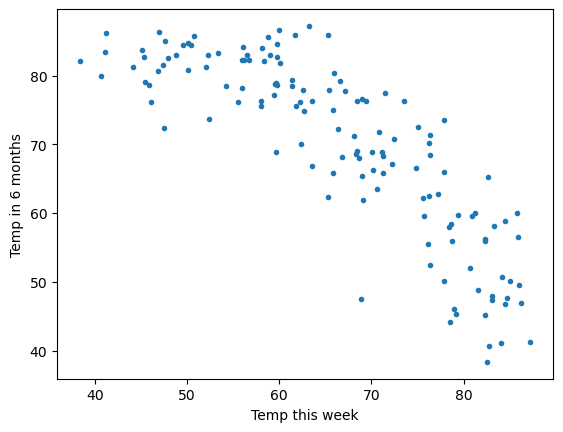

In [38]:
plt.scatter(week_mean['temp'], week_mean['half_year'], marker='.')
plt.xlabel('Temp this week')
plt.ylabel('Temp in 6 months')